# "LaTeX数学符号显示"
> "SymPy的基础数学，测试数学符号的显示"

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [fastpages, jupyter, 数学]

# SymPy的基础数学

## 引言
计算机代数系统(CAS)可以用来计算复杂的数学表达式、求解方程、实施微积分过程及模拟物理系统。

所有计算机代数系统都能提供本质上相同的功能，因此使用哪种系统并不重要：有免费的系统，如SymPy, Magma, 或Octave；也有商业化的系统，如Maple, MATLAB,和Mathematica等等。

本课程使用SymPy，它是用Python语言编写的一个开源符号代数系统。在符号CAS中，数和运算都用符号来表示，因此得到的答案是精确的。例如，数$\sqrt{2}$在SymPy中被表示为Pow(2,1/2)，而在像Octave这样的数值计算机代数系统中，$\sqrt{2}$被表示为近似值$1.41421356237310$(一个浮点数)。对多数场合而言，近似值也够用了，但有的时候，近似值还是会导致问题：
$$float(\sqrt{2})*float(\sqrt{2}) = 2.00000000000000044 \ne 2.$$ 
因为SymPy使用精确表示，你不会遇到此类问题（除非实现的算法有错误）：
$$Pow(2,1/2)*Pow(2,1/2)= 2.$$

## 导入SymPy
使用SymPy的最简单方法是访问网站http://live.sympy.org. 

如果在自己的计算机上使用SymPy必须先安装Python，然后将sympy作为Python的一个扩展包导入即可。

例如，在终端运行python，出现>>>提示符。我们用如下命令导入sympy：

import sympy as sp

推荐使用交互式python外壳IPython，或者为了有更佳的体验，使用Python的Web前端Jupyter
Notebook，正如现在我们所使用的。

In [2]:
import sympy as sp   # 导入sympy, 名空间为sp.

## 1. 使用SymPy的基础数学
我们使用SymPy的基本对象和操作来学习初等数学。
SymPy能对数学对象做一些基本数学操作，包括“求解”(方程)、“展开”(表达式)、“分解”(多项式)等等。

###  1.1 数及其运算
Python有两种类型数：int(整数)和float(浮点数)。

In [3]:
5   # 一个整数

5

In [4]:
5.0  # 一个浮点数

5.0

Python中整数对象是整数集合
$$\mathbb{Z} = \{. . . ,−2,−1, 0, 1, 2, . . .\}$$
的忠实表现。
浮点数则是实数集合$\mathbb{R}$的近似表示：浮点数只有小数点后16位数字的精度。

除了除法以外，Python中的常规数学运算，如$+, -, *(乘法), **(乘幂)$，都与普通的数学实践一致。

例如：

In [5]:
2**10    # 2的10幂

1024

涉及到有理数的时候要特别注意：整数的除法可能不会产生你想要得到的结果，因为有时Python不会自动将答案转成浮点数，而是将答案截断，给出最接近的整数。幸运的是，在Python 3.x的最新版本中，这个问题已经解决了。

例如：

In [6]:
1 / 7            # 虽然是int/int，但会自动转换为浮点数。

0.14285714285714285

In [7]:
sp.S("1/7")      # S可用于化简任何表达式。

1/7

In [8]:
sp.Rational(1, 7) # 保留为有理数表达式。

1/7

求解数学问题时，最好使用SymPy对象（数或者符号）并等待出来精确的值。如果要将SymPy对象转换为近似的浮点值，可以调用.evalf()方法，括号中可以用一个正整数来指定需要多少位近似值。

例如：

In [9]:
sp.pi

pi

In [10]:
sp.pi.evalf()

3.14159265358979

In [11]:
sp.pi.evalf(100)

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068

方法.n()与.evalf()等价。

另外，SymPy全局函数N()也可以用于计算数值。

In [12]:
sp.pi.n(100)

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068

### 1.2 符号
SymPy中最有趣的计算要求我们定义符号，即SymPy中用于表示数学变量或未知量的对象。

In [14]:
a = sp.Symbol('a')                            # 定义一个符号
x, y, z, t = sp.symbols('x y z t')            # 同时定义多个符号
k, m, n = sp.symbols('k m n', integer=True)   # 定义多个取整数值的符号
f, g, h = sp.symbols('f g h', function=True)  # 定义多个函数符号

现在你可以想在数学中那样使用这些符号了！

In [15]:
x + 2

x + 2

In [16]:
3 ** x

3**x

In [17]:
x*y + 2*y

x*y + 2*y

In [18]:
sp.init_printing()      # 加入这条语句是为了使数学公式输出更美观。

In [19]:
x*y + 2*y               # 看出来变化了吗？ 

In [20]:
3 ** x

In [21]:
sp.pi       # E表示自然对数的底。

你还可以用下列方法定义变量的序列：

In [22]:
a0, a1, a2, a3 = sp.symbols('a0:4')

In [23]:
a1

下划线符号 _ 是一个特殊的变量，它包含有前一次输出值的结果。这个变量在进行多步运算是非常有用。

例如：

In [24]:
3 + 5

In [25]:
_ ** 3

### 1.3 表达式

SymPy表达式是符号与基本数学运算和其它函数的组合。
函数simplify可以用于化简任何表达式，类似的函数还有factor, expand, collect等。
下面实例中的其它SymPy函数对应于作用表达式的常用函数。

In [26]:
expr = 2*x + 3*x - sp.sin(x) - 3*x + 42
expr

In [27]:
sp.simplify(expr)

In [28]:
sp.factor( x**2-2*x-8 )    # 因式分解

In [29]:
sp.expand((x-4)**100)     # 表达式展开

In [30]:
b = sp.Symbol('b')                      # 符号a在前面已经定义过了（变量均需提前定义）
sp.collect(x**2 + x*b + a*x + a*b, x)   # 关于x的不同幂次合并同类项

若将给定的值代入到表达式中，使用.subs()方法，对于想要的符号-值代换，传递一个python字典对象{key: val, ... }：

In [31]:
expr = sp.sin(x) + sp.cos(y)
expr

In [32]:
expr.subs({x:1, y:2})   # 精确代换

In [33]:
expr.subs({x:1, y:2}).n()  # 使用.n()方法计算出近似值

### 1.4 解方程

函数solve是SymPy核心函数之一，该函数知道如何解所有类型的方程，而且能解得相当好！

函数solve取两个参数，使用solve(expr,var)关于变量var解解方程expr == 0。

你可以将任何方程重写为expr == 0的形式。例如，$A(x) = B(x)$的解与$A(x) − B(x) = 0$的解相同。

比如，要接二次方程$x^2 + 2x − 8 = 0$, 使用下列指令：

In [34]:
sp.solve( x**2 + 2*x - 8, x)

用solve和SymPy解方程最妙的地方是我们得到符号答案。

例如，我们可以解出带有参数的二次方程$ax^2 + bx + c = 0$如下：

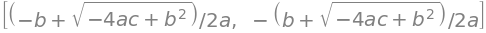

In [35]:
a, b, c = sp.symbols('a b c')
sp.solve(a*x**2 + b*x + c, x)

要从一元二次方程的一般求解公式得到一个特殊方程的解，比如$x^2 + 2x − 8 = 0$，我们可以在一般解公式中使用系数代换$a = 1, b = 2, c = −8$：

In [36]:
gen_sol = sp.solve(a*x**2 + b*x + c, x)
[gen_sol[0].subs({'a':1,'b':2,'c':-8}),
 gen_sol[1].subs({'a':1,'b':2,'c':-8})]

如要求解方程组，可以给solve的第一个参数提供方程的列表，并为第二个参数指定要解的未知量列表

例如，要关于$x$和$y$求解方程组$x + y = 3,3x − 2y = 0$：

In [37]:
sp.solve([x + y - 3, 3*x - 2*y], [x, y])

假设你要求表达式$x^2 − 4x + 7$的完全平方，即找出常数$h,k$，使得
$$x^2−4x+7 = (x−h)^2 + k.$$ 

SymPy中没有专门的“完全平方”函数，但是可以通过求解方程
$$(x − h)^2 + k − (x^2 − 4x + 7) = 0$$
来找出未知的$h$和$k$：

In [39]:
h, k = sp.symbols('h k')
sp.solve((x - h)**2 + k - (x**2 - 4*x + 7),[h,k]) # 解出h和k的值
#((x - 2)**2 + 3).expand()   # 验证一下

### 1.5 有理函数

默认情况下，SymPy不会对有理表达式进行组合或分解。

如果要符号计算分式的加法，需要使用together函数：

In [40]:
a, b, c, d = sp.symbols('a b c d')
a/b + c/d

In [41]:
sp.together(a/b + c/d)

如果你想将一个写成分子除以分母形式的有理表达式化成最简分式，使用apart函数：

In [42]:
sp.apart((x**2+x+4)/(x+2))

### 1.6 指数函数与对数函数

欧拉常数$e = 2.71828...$，在SymPy中记为E。

可以用几种方式来定义欧拉常数：
$$e = \lim_{n \to \infty}(1 + {\frac 1 n})^n,$$
$$e = \lim_{\varepsilon \to 0}(1 + \varepsilon)^{\frac 1 \varepsilon},$$
$$e = \sum_{n = 0}^{\infty}{\frac 1 {n!}}.$$

函数$exp(x)$等价于$E**x.$，函数$log$和$ln$都是以$e$为底的对数。

In [43]:
sp.log(sp.E**3) # 与sp.ln(E**3)相同

缺省情况下，SymPy假定像exp和log这样的函数输入都是复数，因此不会展开确定的对数表达式。

可以指示SymPy输入是正实数，这样展开就正常工作了：

In [44]:
x, y = sp.symbols('x y')
sp.log(x*y).expand()

In [45]:
a, b = sp.symbols('a b', positive=True)
sp.log(a*b).expand()

### 1.7 多项式

一个多项式$P$的根是方程$P(x) = 0$的解。
我们定义一个多项式$P$，具有三个根$x = 1, x = 2, x = 3$：

In [46]:
P = (x-1)*(x-2)*(x-3)
P

In [47]:
P.expand()       # .expand方法将多项式展开

要将多项式分解成因式的乘积，调用factor方法，或者用simplify化简：

In [48]:
P.factor()

In [49]:
P.simplify()

可以使用solve函数找到多项式的根：

In [50]:
roots = sp.solve(P,x)
roots

In [51]:
sp.simplify(P - (x-roots[0])*(x-roots[1])*(x-roots[2]))   # 验证一下！

### 1.8 等式验证

在上面的例子中，我们使用simplify函数检验两个表达式是否相等。这种检验等式方法之所以有效是因为
$P = Q$当且仅当$P − Q = 0$。

这是用SymPy检验两个表达式是否相等的最佳方式，因为在比较表达式时算法会尝试所有可能的化简。

下面是检验两个量是否相等或不等的一些例子：

In [52]:
p = (x - 5)*(x + 5)
q = x**2 - 25
p == q                  # 作为表达式，p,q是不同的！

False

In [53]:
p - q == 0

False

In [54]:
sp.simplify(p - q) == 0    # 化简后p,q相同！

True

In [55]:
sp.sin(x)**2 + sp.cos(x)**2 == 1

False

In [56]:
sp.simplify(sp.sin(x)**2 + sp.cos(x)**2 - 1 ) == 0

True

In [57]:
sp.simplify(sp.sin(x)**2 + sp.cos(x)**2 ) == 1    # 不移项也行

True

### 1.9 三角函数

In [58]:
from sympy import sin, cos, tan, trigsimp, expand_trig

三角函数sin和cos的输入为弧度，如果使用角度要乘以转换因子$\frac \pi {180}$：

In [59]:
sin(sp.pi/6)           # 为什么要写成sp.pi/6 ？

In [60]:
cos(sp.pi/6)

In [62]:
sin(30*sp.pi/180)   # 30度 = pi/6弧度 = 180度/6

反三角函数$\sin^{−1}(x) = \arcsin(x), \cos^{−1}(x) = \arccos(x)$在Sympy中分别表示为asin, acos。

In [65]:
sp.asin(1/2)

In [66]:
sp.acos(sp.sqrt(3)/2)

正切函数$\tan(x)= \frac {\sin(x)} {\cos(x)}.$ 

$\tan(x)$的反函数为$\tan^{−1}(x)= \arctan(x)$，在Sympy中表示为atan(x)。

函数acos返回范围$[0,\pi]$之间的一个值，而asin和atan返回$[-\frac {\pi} 2,\frac {\pi} 2]$之间的一个值。

In [67]:
tan(sp.pi/6)

In [68]:
sp.atan(1/sp.sqrt(3))

下面是SymPy知道的一些三角恒等式：

In [69]:
sp.sin(x) == sp.cos(x - sp.pi/2)

True

In [70]:
sp.simplify(sp.sin(x)*sp.cos(y) + sp.cos(x)*sp.sin(y))  # sinxcosy+cosxsiny = sin(x+y)

对三角函数而言，trigsimp与simplify的作用基本相同。

In [71]:
e = 2*sin(x)**2 + 2*cos(x)**2
trigsimp(e)

In [72]:
trigsimp(sp.log(e))

In [73]:
sp.simplify(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

如果你想要的不是化简而是展开，应该使用expand_trig，因为默认的expand不会处理三角函数：

In [74]:
sp.expand(sin(2*x))    # = (sin(2*x)).expand()

In [75]:
expand_trig(sin(2*x)) # = (sin(2*x)).expand(trig=True)

### 1.10 双曲三角

SymPy中的双曲正弦和双曲余弦分别记为sinh和cosh，在化简表达式时，SymPy能识别出来这些函数：

In [76]:
sp.simplify((sp.exp(x) + sp.exp(-x))/2 )

In [77]:
sp.simplify((sp.exp(x) - sp.exp(-x))/2)

$x = \cosh(μ)$和$y = \sinh(μ)$定义为双曲线$x^2 − y^2 = 1$上点的坐标$x$和$y$，因此
满足恒等式$\cosh^{2}(x) − \sinh^{2}(x) = 1$:

In [78]:
sp.simplify(sp.cosh(x)**2 - sp.sinh(x)**2)

## 2. 复数

In [79]:
from sympy import I, re, im, Abs, arg, conjugate

### 2.1 基本运算

虚数单位$i = \sqrt{−1}$ (在SymPy中记为I) 满足方程：

In [80]:
I*I

In [81]:
sp.solve(x**2 + 1, x)

复数有实部和虚部：

In [82]:
z = 4 + 3*I
z

In [83]:
re(z)

In [84]:
im(z)

对于复数$z = a + bi$，$z$的共轭为：
$$\overline{z} = a − bi.$$
$z$的模（或绝对值）为：
$$|z| = \sqrt{a^2 + b^2}.$$

$z$的极坐标表示为：
$$z = |z|e^{i\theta},$$
$\theta$称为$z$的幅角。

In [85]:
conjugate(z)  # 共轭复数

In [86]:
Abs(z)

In [87]:
arg(z)

### 2.2 欧拉公式

欧拉公式展示了指数函数$e^x$和三角函数$\sin(x),\cos(x)$之间的一个重要关系：
$$e^{ix} = \cos x + i \sin x.$$
在SymPy中要得到这个结果，你必须指定x是实数，并告诉expand你要的是复表达式：

In [88]:
x = sp.symbols('x', real=True)
sp.exp(I*x).expand(complex=True)

In [89]:
re(sp.exp(I*x))

In [90]:
im(sp.exp(I*x))

欧拉公式经常用来将关于sin和cos的函数重写为复指数的形式。

例如：

In [91]:
(sp.cos(x)).rewrite(sp.exp)      # 与双曲三角函数的情况对比一下。

## 3. 微积分

本节中，我们学习使用SymPy函数计算极限、导数、积分及级数求和。

### 3.1 无穷

In [92]:
from sympy import oo

在SymPy中，无穷大记号是oo。

无穷大不是一个数，而是一个无休止的计数过程。于是$\infty + 1 = \infty.$

$\infty$比任何有限数都大，而且$\frac 1 \infty$是一个无穷小。

Sympy知道如何正确处理表达式中的无穷大：

In [93]:
sp.oo + 1

In [94]:
500000000000000000000 < oo

True

In [95]:
1/oo

### 3.2 极限

In [96]:
from sympy import limit

极限可以精确描述无穷大量、无穷小量，以及具有无限多个步骤的过程。

例如，欧拉常数$e$定义为极限:
$$e = \lim_{n \to \infty}(1 + {\frac 1 n})^n.$$

In [97]:
n = sp.symbols('n', integer=True)
limit((1+1/n)**n, n, oo)

极限也可以用于描述函数的行为。

考虑函数$f(x) = \frac 1 x.$ 

In [98]:
x = sp.Symbol('x')
limit(1/x, x, 0, dir="+")  # 0+

In [99]:
limit(1/x, x, 0, dir="-")  # 0-

In [100]:
limit(1/x, x, oo)

以下是另外一些函数极限的例子。

In [101]:
limit(sp.sin(x)/x, x, 0)

In [102]:
limit(sp.sin(x)**2/x, x, 0)

In [103]:
limit(sp.exp(x)/x**100, x, oo) # e^x和x^100哪个更大？  同阶无穷大？

### 3.3 导数

In [104]:
from sympy import diff  # 如果写import sympy as sp 则写语句时较麻烦，sp.diff()，而这么写只用diff即可

SymPy函数diff用于计算任何表达式的导数：

In [105]:
diff(x**3, x)

diff运算知道求导的乘积法则、商法则和链式法则：
$$[f(x)g(x)]' = f'(x)g(x) + f(x)g'(x),$$

$$[\frac {f(x)} {g(x)}]' = \frac {f'(x)g(x) - f(x)g'(x)} {g(x)^2},$$

$$f(g(x))' = f'(g(x))g'(x).$$ 

In [106]:
diff(x**2*sp.sin(x), x)

In [107]:
diff(sp.sin(x**2), x)

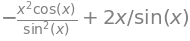

In [108]:
diff(x**2/sp.sin(x), x)

函数$f$的二阶导数是diff(f, x, 2)：

In [109]:
diff(x**3, x, 2)  # 与diff(diff(x**3, x), x)相同

指数函数$f(x) = e^x$非常特殊，因为它等于自己的导数：

In [110]:
diff(sp.exp(x), x)     #与diff(E**x, x)相同

那么，什么样的函数$f(x)$等于其导数呢？使用解微分方程的函数dsolve可以找到答案：

In [111]:
x = sp.symbols('x')
f = sp.symbols('f', function=True)  # 现在可以使用f(x)
sp.dsolve(f(x) - sp.diff(f(x),x), f(x))

TypeError: 'Symbol' object is not callable

### 3.4 切线

函数$f(x)$在点$x = x_0$处的切线可由下列方程给出：
$$T_1(x)=f(x_0)+f'(x_0)(x−x_0).$$

例如，求函数$f(x)= {\frac 1 2}x^2$在$x_0 = 1$处的切线。

In [112]:
f = sp.S('1/2')*x**2
f

In [113]:
df = sp.diff(f, x)
df

In [114]:
T_1 = f.subs({x:1}) + df.subs({x:1})*(x - 1)
T_1

切线$T_1(x)$与函数$f(x)$在$x = 1$处有相同的值以及斜率。

In [115]:
T_1.subs({x:1}) == f.subs({x:1})

True

In [116]:
diff(T_1, x).subs({x:1}) == diff(f, x).subs({x:1})

True

### 3.5 优化

优化就是对一个函数$f(x)$选取一个输入值，使之产生$f(x)$的最佳结果。最佳值通常意味着最大值或最小值。

导数$f'(x)$编码了关于$f(x)$的斜率的信息：正斜率$f'(x) > 0$意味着$f(x)$是递增的，负的斜率意味着$f(x)$是递减的。零斜率$f'(x) = 0$意味着函数图象是水平的。

函数$f(x)$的临界点是方程$f'(x) = 0$的解。每个临界点都是该函数的最大值或者最小值的候选者。

二阶导数$f''(x)$编码了关于$f(x)$的曲率的信息：正曲率意味着函数像$x^2$那样弯曲，负曲率意味着函数像$−x^2$那样弯曲。

我们求函数$f(x) = x^3 − 2x^2 + x$的临界点，并使用二阶导数的信息求出函数在区间$[0,1]$中的极值。

In [117]:
x = sp.Symbol('x')
f = x**3 - 2*x**2 + x
sp.diff(f, x)

In [118]:
sols = sp.solve(diff(f,x), x)  # 高等数学求拐点的方法
sols

In [119]:
diff(diff(f,x), x).subs({x:sols[0]})

In [120]:
diff(diff(f,x), x).subs({x:sols[1]})

通过考察函数的图象可以看出，函数$f(x)$在区间$[0,1]$中的点$x = \frac 1 3$处取到
最大值$f(\frac 1 3) = \frac 4 {27}$，$x = 1$是$f(x)$的一个局部极小值。

### 3.6 积分

$f(x)$的**积分**对应于函数$f(x)$在$x = a$和$x = b$之间所包围的面积:
$$A(a,b)= \int_{a}^{b}f(x)dx.$$

在SymPy中，使用integrate(f,x)来得到任意函数$f(x)$的积分函数$F(x)$:
$$F(x) = \int_{0}^{x}f(u)du.$$

In [121]:
sp.integrate(x**3, x)

In [122]:
sp.integrate(sp.sin(x), x)

In [123]:
sp.integrate(sp.ln(x), x)

上面这样的形式称为不定积分，因为没有指定积分的限。

使用integrate(f, (x,a,b))来计算如下形式的定积分（面积）：
$$A(a,b)= \int_{a}^{b}f(x)dx.$$

In [124]:
sp.integrate(x**3, (x,0,1))

我们也可以使用牛顿-莱布尼兹公式（Newton-Leibniz formula）
$$A(a,b)= \int_{a}^{b}f(x)dx = F(b) - F(a)$$
来计算定积分的值。

In [125]:
F = sp.integrate(x**3, x)
F.subs({x:1}) - F.subs({x:0})

积分对于着有符号的面积：

In [126]:
sp.integrate(sp.sin(x), (x,0,sp.pi))

In [127]:
sp.integrate(sp.sin(x), (x,sp.pi,2*sp.pi))

In [128]:
sp.integrate(sp.sin(x), (x,0,2*sp.pi))

### 3.7 微积分基本定理

积分是导数的“逆运算”：如果你对某个函数先积分后求导，你将得到原来的函数：
$$({\frac d {dx} \circ \int dx})\ f(x) = {\frac d {dx}}\int_{c}^{x}f(u)du = f(x).$$

In [129]:
f = x**2
F = sp.integrate(f, x)
F

In [130]:
sp.diff(F, x)

反之，如果你对某个函数先求导再积分，你仍然得到原始的函数（加上一个任意常数）：
$$(\int dx \circ {\frac d {dx}})\ f(x) = \int_{c}^{x}f’(u)du = f(x) + C.$$

In [131]:
f = x**2
df = sp.diff(f, x)
df

In [132]:
sp.integrate(df, x)

### 3.8 序列

序列是以整数作为定义域（输入）的函数，我们将序列记为$a_n$，而不是通常的函数记号$a(n)$.

我们通过指定序列的第$n$项（通项）来定义序列：

In [133]:
a_n = 1/n                  # 可递推
b_n = 1/sp.factorial(n)

In [134]:
a_n

In [135]:
b_n

In [136]:
a_n.subs({n:5})

Python的list理解语法[item for item in list]，
可以用于打印一个范围内的序列值：

In [137]:
[a_n.subs({n:i}) for i in range(0,8)]

In [138]:
[b_n.subs({n:i}) for i in range(0,8)]

注意$a_n$对于$n = 0$是没有确切的定义的，因此会返回被零除的错误。

准确地讲，我们说该序列$a_n$的定义域是自然数：$a_n \colon \mathbb{N^+} \to \mathbb{R}.$ 

我们可以观察到阶乘函数$n! = 1·2·3···(n−1)·n$的增长有多么的快：
$$7! = 5040,10! = 3628800,20! > 10^{18}.$$

我们经常需要计算当$n \to \infty$时，序列$a_n$的极限。

In [139]:
sp.limit(a_n, n,oo)

In [140]:
sp.limit(b_n, n,oo)

很多重要的数学量都是通过极限表达式来定义的。一个有意思的例子是考虑常数$\pi,$
它定义为单位半径的圆的面积。我们可以通过包围圆的正多边形的面积来逼近单位圆的面积。

通过将正$n$边形分解成恒等的三角形切片，我们可以得到其面积$A_n,$然后令$n \to \infty,$给出单位圆的面积。

In [141]:
A_n = n * sp.tan(2*sp.pi/(2*n))
sp.limit(A_n, n,oo)

### 3.9 级数

给定一个序列$a_n,$我们希望计算序列中所有值的和$\sum_{n}^{\infty}a_n.$ 

对序列$a_n \colon \mathbb{N} \to \mathbb{R}$求和类似于对函数$f \colon \mathbb{R} \to \mathbb{R}$求积分。

SymPy中用于求和的函数是summation，其语法类似于积分函数integrate。

In [142]:
a_n = 1/n
b_n = 1/sp.factorial(n)
sp.summation(a_n, [n, 1, oo])

In [143]:
sp.summation(b_n, [n, 0, oo])  # 求和，顺便考虑求积符号？  # 可以算无穷和（sum不行）

summation命令允许我们计算无穷和，但是对大多数实用的目的，得到无穷和的一个好近似就够了。

使用标准Python求和命令sum,通过求出无穷和的前$10$项，我们可以得到$e$的精确到$6$位小数的近似值。

In [144]:
import math  # 仅使用Python重新计算，对比一下
def b_nf(n):
    return 1.0/math.factorial(n)
sum([b_nf(n) for n in range(0,10)])

In [150]:
sp.E.evalf(17)

In [151]:
exp_xn = x**n/sp.factorial(n)
a = sp.summation(exp_xn.subs({x:5}), [n, 0, oo] )

In [152]:
a

In [155]:
a.evalf(17)

In [154]:
import math # 仅使用Python重新计算，对比一下
def exp_xnf(x,n):
    return x**n/math.factorial(n)
sum([exp_xnf(5.0,i) for i in range(0,35)])

### 3.10 泰勒级数 series

一个函数的幂级数展开称为Taylor级数，展开的系数依赖于该函数的高阶导数。

$f(x)$在$x = c$点的泰勒级数的第$n$项由下列公式给出：

$$a_n(x) = \frac {f^{(n)}(c)} {n!}(x − c)^n,$$

其中$f^{(n)}(c)$是$f(x)$的$n$阶导数在$x = c$处的值。

术语Maclaurin（麦克劳林）级数专指在$x = 0$处的泰勒级数。

SymPy的函数series可用于得到任意函数的泰勒级数：
调用series(expr,var,at,nmax)显示expr在var=at处的级数展开，最高幂次到nmax-1。

In [156]:
sp.series(sp.sin(x), x, 0, 10)

In [157]:
sp.series(sp.cos(x), x, 0, 8)

In [158]:
sp.series(sp.sinh(x), x, 0, 8)

In [159]:
sp.series(sp.cosh(x), x, 0, 8)

有些函数在$x = 0$处没有定义，因此我们关于一个不同的$x$值来展开。

例如，$ln(x)$在$x = 1$处的幂级数展开为：

In [160]:
sp.series(sp.ln(x), x, 1, 6) # ln(x)在x = 1处的Taylor级数展开

我们也可以通过在$x = 0$展开$ln(x + 1)$：

In [161]:
sp.series(sp.ln(x+1), x, 0, 6) # ln(x+1)的Maclaurin级数

## 4. 矩阵与向量

### 4.1 矩阵

矩阵$A \in \mathbb{R}^{m \times n}$是一个$m$行和$n$列的矩形实数阵列。

In [162]:
from sympy import Matrix  # 再引用Matrix时不必用sp.Matrix了！方便！当然，用sp.Matrix也对

In [163]:
A = Matrix([[ 2,-3,-8, 7],
            [-2,-1, 2,-7],
            [ 1, 0,-3, 6]])
A

⎡2   -3  -8  7 ⎤
⎢              ⎥
⎢-2  -1  2   -7⎥
⎢              ⎥
⎣1   0   -3  6 ⎦

使用方括号可访问矩阵的元素或得到子矩阵：

In [166]:
A[0,1]  # A的第0行、第1列   #注意从0开始编号

In [167]:
A[0:2,0:3] # A的最左上角的2x3子矩阵

⎡2   -3  -8⎤
⎢          ⎥
⎣-2  -1  2 ⎦

一些常用的特殊矩阵可以使用快速方法创建：

In [168]:
sp.eye(2)  # 2x2单位矩阵   sp有一些专门给Matrix的方法

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

In [169]:
sp.zeros(2, 3)

⎡0  0  0⎤
⎢       ⎥
⎣0  0  0⎦

标准的代数运算，比如加法+、减法-、乘法$*$、和指数运算$**$对矩阵都可以进行。

转置运算transpose将矩阵沿其对角线翻转：

In [170]:
A.transpose()   # 等同于A.T，但是没有A'

⎡2   -2  1 ⎤
⎢          ⎥
⎢-3  -1  0 ⎥
⎢          ⎥
⎢-8  2   -3⎥
⎢          ⎥
⎣7   -7  6 ⎦

### 4.2 矩阵的行操作

In [173]:
M = sp.eye(3)
M[1,:] = M[1,:] + 3 * M[0,:]
M

⎡1  0  0⎤
⎢       ⎥
⎢3  1  0⎥
⎢       ⎥
⎣0  0  1⎦

Gauss-Jordan消元法是对矩阵实施的一系列行操作，可以将任何矩阵变换为行简约梯形标准型(RREF)。在SymPy中，rref方法用于计算一个矩阵的RREF：

In [175]:
A = Matrix([[2,-3,-8, 7],
            [-2,-1,2,-7],
            [1 ,0,-3, 6]])
A

⎡2   -3  -8  7 ⎤
⎢              ⎥
⎢-2  -1  2   -7⎥
⎢              ⎥
⎣1   0   -3  6 ⎦

In [176]:
A.rref()  #直接梯形标准化

⎛⎡1  0  0  0 ⎤           ⎞
⎜⎢           ⎥           ⎟
⎜⎢0  1  0  3 ⎥, (0, 1, 2)⎟
⎜⎢           ⎥           ⎟
⎝⎣0  0  1  -2⎦           ⎠

注意，rref方法返回两组值：第一组是矩阵$A$的行简约梯形标准型RREF；而第二组指示在$A$的RREF中，每行第一个1的位置（所在的列），这些1也称为主元。

例如，上例中后面的一组值[0, 1, 2]表示主元的位置。

如果只想得到$A$的RREF，使用A.rref()[0].

In [177]:
A.rref()[0]

⎡1  0  0  0 ⎤
⎢           ⎥
⎢0  1  0  3 ⎥
⎢           ⎥
⎣0  0  1  -2⎦

### 4.3 基本子空间
考虑矩阵$A \in \mathbb{R}^{m \times n}.$ 伴随着$A$有三个重要的基本子空间：
* 列空间$\mathcal{C}(A)$ 是$A$的由RREF中主元所指示的那些列所张成的子空间。
* 零空间$\mathcal{N}(A)$ 是所有满足$A \vec{x} = \vec{0}$的向量$\vec{x}$所构成的子空间。
* 行空间$\mathcal{R}(A)$是零空间的正交补。 

当我们将矩阵$A$视为线性变换$T_A \colon \mathbb{R}^{n} \to \mathbb{R}^{m}$时，这些子空间显得格外重要。

线性变换$T_A$定义为：对于$\vec{x} \in \mathbb{R}^{n},T_A(\vec{x}) = A\vec{x}.$
* $\mathcal{C}(A) = Im(T_A)$（$T_A$的像空间）
* $\mathcal{N}(A) = Ker(T_A)$（满足$T_A(\vec{x}) = \vec{0}$的所有向量集合）
* $\mathcal{R}(A)$是零空间的正交补。

In [178]:
[A.rref()[0][r,:] for r in A.rref()[1]]   # R(A)

[[1  0  0  0], [0  1  0  3], [0  0  1  -2]]

In [179]:
[A[:,c] for c in A.rref()[1]]  # C(A)，注意要选原始矩阵A的列，不是RREF的列

⎡⎡2 ⎤  ⎡-3⎤  ⎡-8⎤⎤
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢-2⎥, ⎢-1⎥, ⎢2 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎣⎣1 ⎦  ⎣0 ⎦  ⎣-3⎦⎦

In [180]:
A.nullspace()  # N(A)

⎡⎡0 ⎤⎤
⎢⎢  ⎥⎥
⎢⎢-3⎥⎥
⎢⎢  ⎥⎥
⎢⎢2 ⎥⎥
⎢⎢  ⎥⎥
⎣⎣1 ⎦⎦

### 4.4 行列式
矩阵$A$的行列式，记为$det(A)$或者$|A|$，是表征矩阵很多性质的一个数，可用于计算由$A$的行（或列）构成几何体的面积或体积、求解线性方程组、检验矩阵是否可逆等等。

In [181]:
M = Matrix([[1, 2, 3],
            [2,-2, 4],
            [2, 2, 5]])
M.det()

### 4.5 矩阵的逆
对于可逆矩阵$A$，存在逆矩阵$A^{-1}$，即满足：
$$A A^{-1} = A^{-1}A = \mathbb{I}.$$

In [182]:
A = Matrix([[1,2],
            [3,9]])
A

⎡1  2⎤
⎢    ⎥
⎣3  9⎦

In [183]:
B = A.inv()
B

⎡3   -2/3⎤
⎢        ⎥
⎣-1  1/3 ⎦

In [184]:
A * B

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

In [185]:
B * A

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

### 4.6 特征向量与特征值
若一个向量$\vec{e}$满足:
$$A \vec{e} = \lambda \vec{e},$$
则$\vec{e} = \vec{e}_{\lambda}$称为$A$的一个特征向量，常数$\lambda$称为$A$的（对应于$\vec{e}$的）一个特征值。

要求出特征值，从方程$A \vec{e} = \lambda \vec{e}$出发，通过插入单位矩阵，
$$A \vec{e} = \lambda \mathbb{I} \vec{e} \Longrightarrow (A - \lambda \mathbb{I}) \vec{e} = \vec{0}.$$.

当特征多项式$p(x) = |A - \lambda \mathbb{I}| = 0$时，这个方程由非平凡解。

$A$的特征值${\lambda_1,\lambda_2, ... ,\lambda_n}$是特征多项式的根。

In [187]:
A = Matrix([[ 9, -2],
            [-2, 6]])
A.eigenvals()          # 与solve(det(A-eye(2)*x),x)相同

{5:1,10:1}表示特征值的“重数”都是1.

In [188]:
A.eigenvects()

⎡⎛      ⎡⎡1/2⎤⎤⎞  ⎛       ⎡⎡-2⎤⎤⎞⎤
⎢⎜5, 1, ⎢⎢   ⎥⎥⎟, ⎜10, 1, ⎢⎢  ⎥⎥⎟⎥
⎣⎝      ⎣⎣ 1 ⎦⎦⎠  ⎝       ⎣⎣1 ⎦⎦⎠⎦

某些特殊的矩阵可以用特征向量和特征值完全表示出来。
* 若矩阵$\Lambda$是由的特征值构成的对角矩阵，$Q$是由的特征向量为列构成的矩阵：
$$\Lambda =  \begin{pmatrix}
                 \lambda_1 & \cdots  & 0         \\
                 \vdots     & \ddots  & \vdots   \\
                 0         & \cdots  & \lambda_n \\
               \end{pmatrix},
  Q = [\vec{e}_{\lambda_1} \cdots \vec{e}_{\lambda_n}].$$
* 则有：
$$A = Q \Lambda Q^{-1}.$$
* 可以写为这种形式的矩阵称为可对角化的。

In [189]:
Q,L = A.diagonalize()

In [190]:
Q                # 特征向量矩阵

⎡1  -2⎤
⎢     ⎥
⎣2  1 ⎦

In [191]:
Q.inv()

⎡1/5   2/5⎤
⎢         ⎥
⎣-2/5  1/5⎦

In [192]:
L                # 特征值对角矩阵

⎡5  0 ⎤
⎢     ⎥
⎣0  10⎦

In [193]:
Q * L * Q.inv()   # A的特征分解

⎡9   -2⎤
⎢      ⎥
⎣-2  6 ⎦

In [194]:
Q.inv() * A * Q   # 由A和Q得到L

⎡5  0 ⎤
⎢     ⎥
⎣0  10⎦

注意：并非所有矩阵都是可对角化的。

可以通过调用is_diagonalizable方法判断一个矩阵是否可对角化：

In [195]:
A.is_diagonalizable()

True

In [196]:
B = Matrix([[1, 3],
            [0, 1]])
B.is_diagonalizable()

False

In [197]:
B.eigenvals()     # 特征值1的重数为2

In [198]:
B.eigenvects()

⎡⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜1, 2, ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣0⎦⎦⎠⎦

矩阵$B$不可对角化，因为它没有一组完全的特征向量。

$B$只有一个特征向量，因此无法构成特征向量矩阵$Q$（少一列！）

非正方矩阵没有特征值分解，但可以有奇异值分解（SVD）：非正方矩阵$A$可以分解为左奇异向量矩阵、右奇异向量矩阵和奇异值的对角矩阵。

对任何矩阵可以使用singular_values方法求得奇异值。

### 4.7 向量
一个向量$\vec{v} \in \mathbb{R}^n$就是实数的$n-$元组。

例如，考虑有三个分量的向量：

$$\vec{v} = (v_1,v_2,v_3) \in (\mathbb{R},\mathbb{R},\mathbb{R}) = \mathbb{R}^3.$$

因为向量是一种特殊的矩阵，因此在SymPy中，Matrix也用于向量。

In [199]:
u = sp.Matrix([[4,5,6]]) # 行向量 = 1x3矩阵
v = sp.Matrix([[7],
               [8],
               [9]])     # 列向量 = 3x1矩阵

In [200]:
u

[4  5  6]

In [201]:
v  # 这里和py自带的元组是不一样的，可以对比一下

⎡7⎤
⎢ ⎥
⎢8⎥
⎢ ⎥
⎣9⎦

In [204]:
[[1],
 [2],
 [3]]

In [202]:
v.T        # .T是转置运算

[7  8  9]

In [205]:
u[0]

In [206]:
u.norm()   # u的长度（范数）,这里用的是2-范数，即平方和的开方

In [207]:
u1 = u/u.norm()     # 与u同方向的单位向量

In [208]:
u1

⎡4⋅√77  5⋅√77  6⋅√77⎤
⎢─────  ─────  ─────⎥
⎣  77     77     77 ⎦

In [209]:
u1.norm()  #单位向量的 2-范数 = 1

### 4.8 向量点积

两个3-维向量$\vec{u}$和$\vec{u}$的点积可以按照两种方法来定义：

$$ \vec{u}·\vec{v} = \underbrace{{u_x}{v_x} + {u_y}{v_y} + {u_z}{v_z}}_{代数定义}
 = \underbrace{\Vert{\vec{u}}\Vert \Vert {\vec{v}} \Vert \cos(\varphi)}_{几何定义}$$
 
其中$\varphi$是向量$\vec{u}$和$\vec{v}$之间的夹角。 

In [210]:
u = sp.Matrix([ 4,5,6])
v = sp.Matrix([-1,1,2])

In [211]:
u.dot(v)           # u和v的点积

In [212]:
u.dot(v) == v.dot(u)  # 点积满足交换律

True

给定两个向量$\vec{u},\vec{v},$我们可以由下列公式求出两者夹角的余弦：

$$\cos(\varphi)= \frac {\vec{u}·\vec{v}} {{\Vert\vec{u}\Vert} {\Vert\vec{v}\Vert}}
               = \frac {{u_x}·{v_x}+{u_y}·{v_y}+{u_z}·{v_z}}{{\Vert\vec{u}\Vert} {\Vert\vec{v}\Vert}}.$$

然后使用acos函数求出夹角。

* 若两个向量之间的夹角为锐角（即$\varphi < 90^{\circ}$），则$\vec{u}·\vec{v} > 0.$

* 若两个向量之间的夹角为直角（即$\varphi = 90^{\circ}$），则$\vec{u}·\vec{v} = 0,$ 此时称向量$\vec{u},\vec{v}$为垂直的。

* 若两个向量之间的夹角为锐角（即$\varphi > 90^{\circ}$），则$\vec{u}·\vec{v} < 0.$

In [213]:
sp.acos(u.dot(v)/(u.norm()*v.norm())).evalf()

向量的点积运算是交换的：$\vec{u}·\vec{v} = \vec{v}·\vec{u}.$

In [214]:
u.dot(v) == v.dot(u)

True

### 4.9 投影
点积可用于计算投影。假定给定两个向量$\vec{u}$和$\vec{n}$，我们想计算$\vec{u}$沿着$\vec{n}$方向的部分。

基于点积的下列公式将给出答案：
$$\prod_{\vec{n}} = \frac {\vec{u} \cdot \vec{n}} {\| \vec{n}\|} \vec{n}.$$

In [215]:
u = sp.Matrix([4,5,6])
n = sp.Matrix([1,1,1])
(u.dot(n)/n.norm()**2)*n

⎡5⎤
⎢ ⎥
⎢5⎥
⎢ ⎥
⎣5⎦

在$\vec{n}$是单位向量的情形下（即$\| \vec{n}\| = 1,$此时将$\vec{n}$记为$\hat{n}$），投影公式简化为：
$$\prod_{\hat{n}} = ({\vec{u} \cdot \hat{n}}) \ \hat{n}.$$

现在考虑由方程$(1,1,1)·[(x,y,z)−(0,0,0)] = 0$所定义的平面$P$。

$P$是$\mathbb{R}^3$的二维子空间。我们可以将任何向量$\vec{u}\in \mathbb{R}^3$分解成为两部分：$\vec{u} = \vec{v}+ \vec{w}$，使得$\vec{v}$落在平面$P$中，且$\vec{w}$垂直于平面（平行于$\vec{n} = (1, 1, 1)$）。

In [216]:
w = (u.dot(n) / n.norm()**2) * n   # 得到u的垂直于P的部分
w

⎡5⎤
⎢ ⎥
⎢5⎥
⎢ ⎥
⎣5⎦

In [217]:
v = u - (u.dot(n)/n.norm()**2)*n # 与 u - w 相同
v

⎡-1⎤
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎣1 ⎦

### 4.10 叉积
两个向量$\vec{u},\vec{v}$的叉积$\vec{u} \times \vec{v}$仍是是向量。

$\mathbb{R}^3$中基元素的叉积定义如下：

$$\hat{i}\times \hat{j} = \hat{k},\ \hat{j}\times \hat{k} = \hat{i},\ \hat{k}\times \hat{i} = \hat{j}.$$

一般向量的叉积通过线性性质扩展。

In [218]:
u = sp.Matrix([4,5,6])
v = sp.Matrix([-1,1,2])
u.cross(v)     # 叉积结果是向量（有方向），符合右手定理

⎡ 4 ⎤
⎢   ⎥
⎢-14⎥
⎢   ⎥
⎣ 9 ⎦

向量$\vec{u} \times \vec{v}$同时正交于$\vec{u}$和$\vec{v}$。

范数$\|\vec{u} \times \vec{v}\|$与两个向量的长度和夹角的正弦成正比。

In [220]:
(u.cross(v).norm()/(u.norm()*v.norm())).n()  # = sin(0.921......)

“交叉积”这个名字很好地描述了用向量分量计算叉积时的“交叉相乘”运算：
$$\vec{u} \times \vec{v} = ({u}_y{v}_z - {u}_z{v}_y,{u}_z{v}_x - {u}_x{v}_z,{u}_x{v}_y - {u}_y{v}_x).$$

In [221]:
u1,u2,u3 = sp.symbols('u1:4')
v1,v2,v3 = sp.symbols('v1:4')
sp.Matrix([u1,u2,u3]).cross(sp.Matrix([v1,v2,v3]))

⎡u₂⋅v₃ - u₃⋅v₂ ⎤
⎢              ⎥
⎢-u₁⋅v₃ + u₃⋅v₁⎥
⎢              ⎥
⎣u₁⋅v₂ - u₂⋅v₁ ⎦

向量的叉积运算是反交换的：$\vec{u} \times \vec{v} = - \vec{v} \times \vec{u}.$

In [222]:
u.cross(v)

⎡ 4 ⎤
⎢   ⎥
⎢-14⎥
⎢   ⎥
⎣ 9 ⎦

In [223]:
v.cross(u)

⎡-4⎤
⎢  ⎥
⎢14⎥
⎢  ⎥
⎣-9⎦